In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os, glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.layers import BatchNormalization
from keras.regularizers import Regularizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

2023-05-24 12:24:12.447684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from os import listdir
from os.path import isfile, isdir, join
import random

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import seaborn as sns

##### EDA

In [8]:
classes = sorted(listdir("./train"))
classes

['Dark', 'Green', 'Light', 'Medium']

In [48]:
classes = os.listdir('./train')
class_dis = []
from glob import glob

for name in classes:
    path = "./train/" + name + "/*.png"  # Path to the class folder
    num_elements = len(glob(path))  # Counting number of elements using glob
    class_dis.append(num_elements)  # Storing the count in class_dis list

print(class_dis)
# equally distributed

[300, 300, 300, 300]


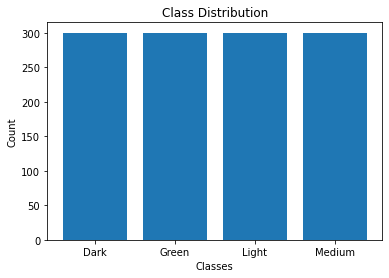

In [200]:

classes = ['Dark', 'Green', 'Light', 'Medium']

plt.bar(classes, class_dis)

plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.show()


In [49]:
folder_path = "./train"
dim_h = []
dim_w = []
for folder_name in os.listdir(folder_path):
    for image in os.listdir(folder_path + '/' + folder_name):
        img = plt.imread(folder_path + '/' + folder_name + '/' + image)
        d1, d2, _ = img.shape
        dim_h.append(d1)
        dim_w.append(d2)

In [50]:
def plot_sample_images(folder_path, samples = 5, figsize = (30, 5)):  
    folder_path = "./train"
    folder_names = os.listdir(folder_path)
    for f in folder_names:
        images_path = folder_path + '/' + f
        fig, ax = plt.subplots(1, samples, figsize = figsize)
        plt.suptitle("Coffee beans belong to " + f)
        # Iterating through the folder and printing n number of samples
        for i in range(samples):
            random_image_name = random.choice(os.listdir(images_path))
            image_matrix = plt.imread(images_path + '/' + random_image_name)
            # imshow() is used to view an image using image matrix
            ax[i].imshow(image_matrix)
            # Giving title to each image in subplots
            ax[i].set_title(random_image_name)
            
        for ax in fig.axes:
            ax.axis('off')

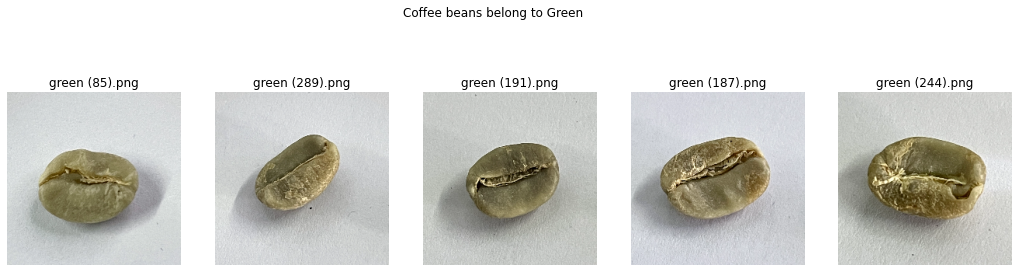

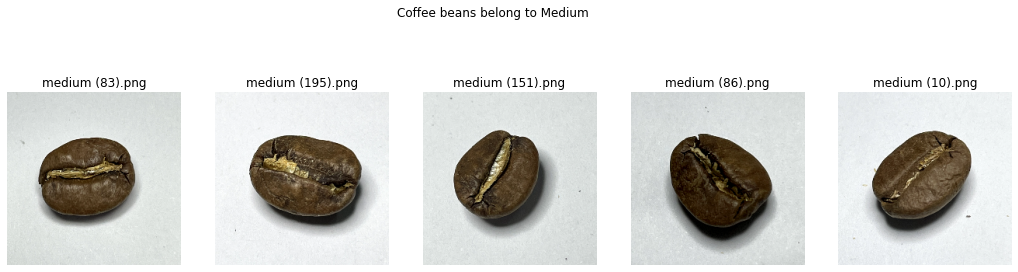

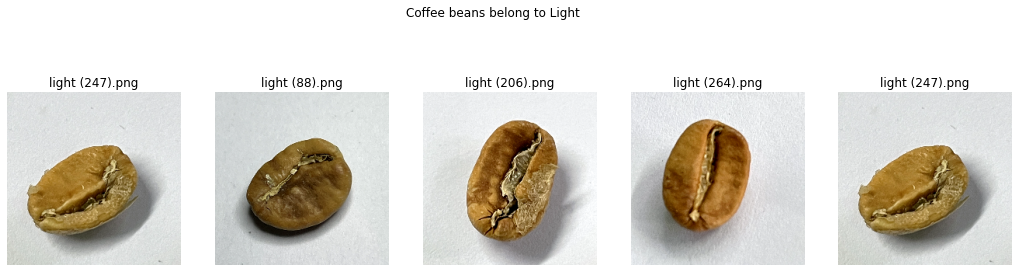

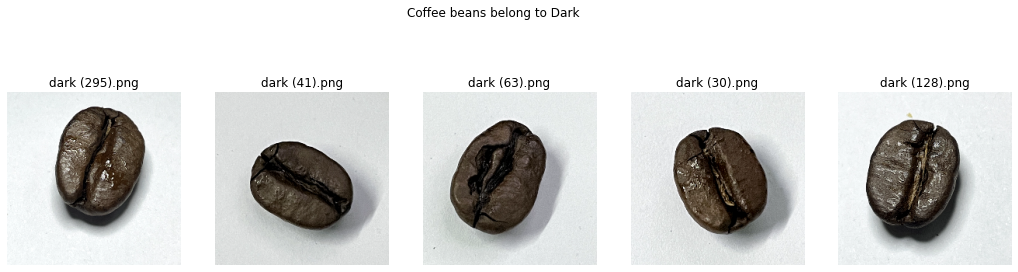

In [51]:
plot_sample_images("./train", samples = 5, figsize = (18, 5))

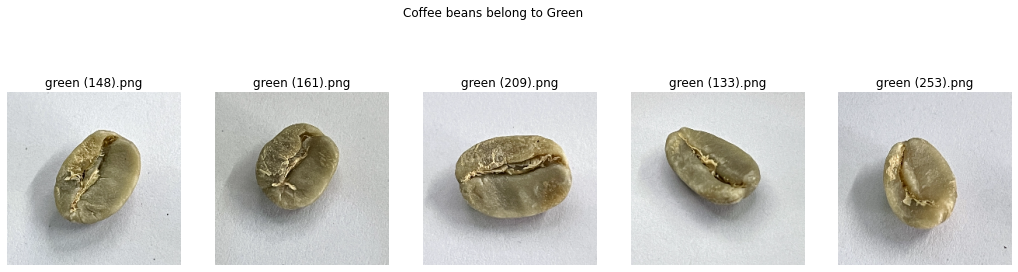

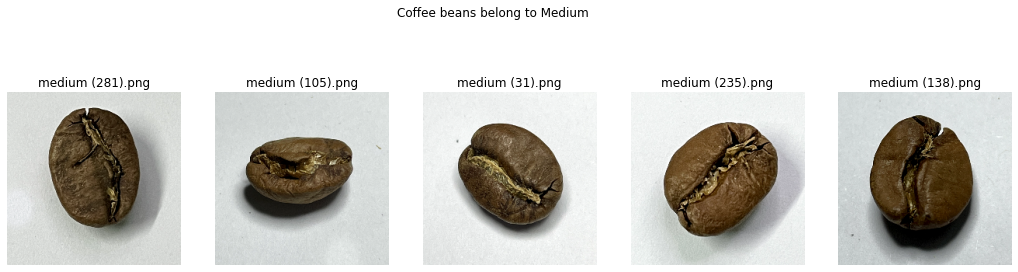

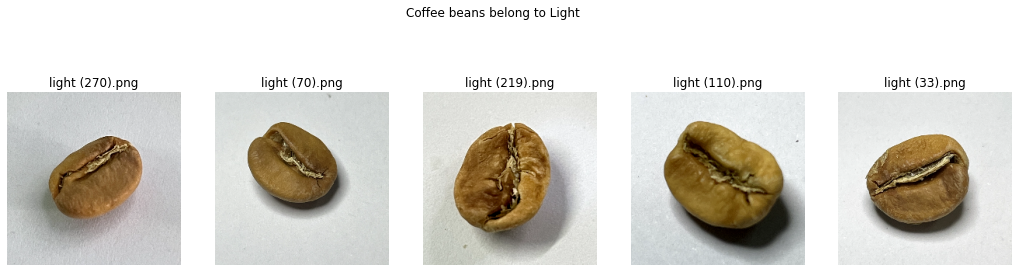

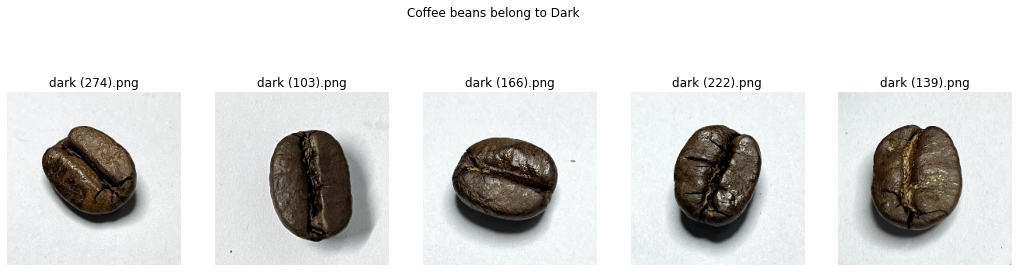

In [52]:
plot_sample_images("./test", samples = 5, figsize = (18, 5))

##### Preprocessing

In [97]:
image_generator = ImageDataGenerator(
    rescale=1/255.,
    rotation_range = 20, 
    width_shift_range = 0.1, 
    height_shift_range = 0.1,
    shear_range = 0.1, 
    zoom_range = 0.1, 
    horizontal_flip = True,
    vertical_flip=True,
    validation_split=0.2,
    fill_mode = 'nearest')

In [98]:
def data_transformation_images(folder, image_gen_object, n = 5, figsize = (35, 5)):
    
    folder_names = os.listdir(folder_path)

    for f in folder_names:
        images_path = folder_path + '/' + folder_name
        
         # Making a subplot for each folder and pulling specified number of images.
        fig, ax = plt.subplots(1, n, figsize = figsize)
        
        # Taking 1 random image from all images
        random_image_name = random.choice(os.listdir(folder + '/' + f))
        random_image = plt.imread(folder + '/' + f + '/' + random_image_name)
        plt.suptitle("Coffee beans roasted " + f + '-> ' + 'Selected image: ' + random_image_name)
        
        # Applying n number of transformations to single randomly selected image and plotting them. 
        for image_num in range(n):
            ax[image_num].imshow(image_gen_object.random_transform(random_image))
            ax[image_num].set_title('Transformation Number: {}'.format(image_num + 1))

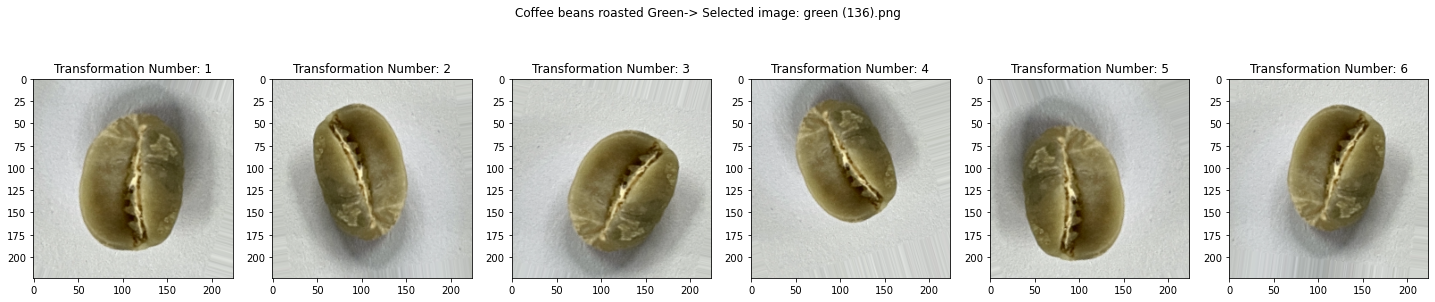

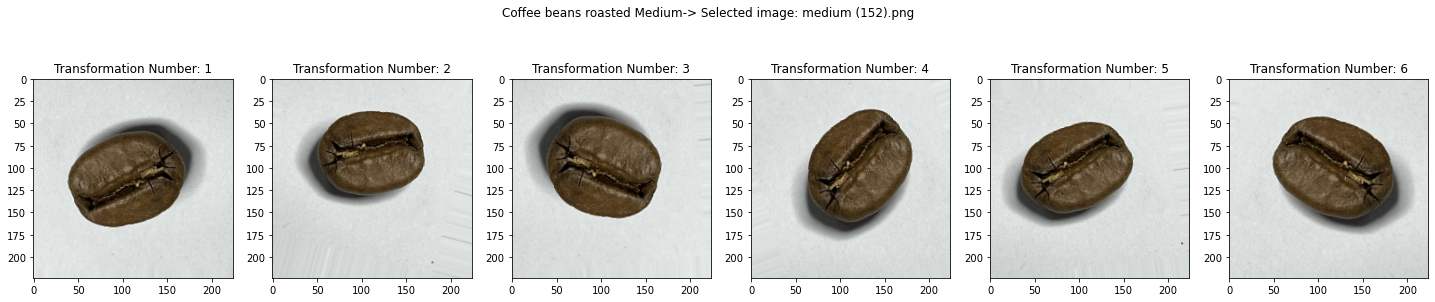

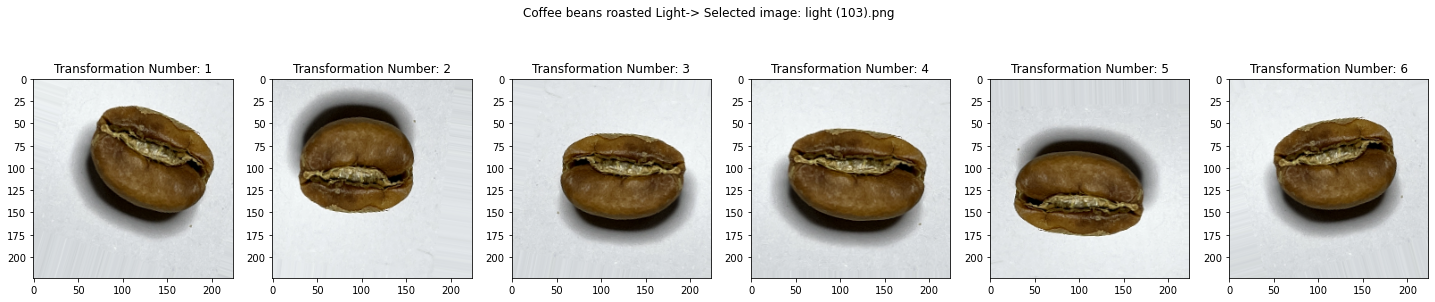

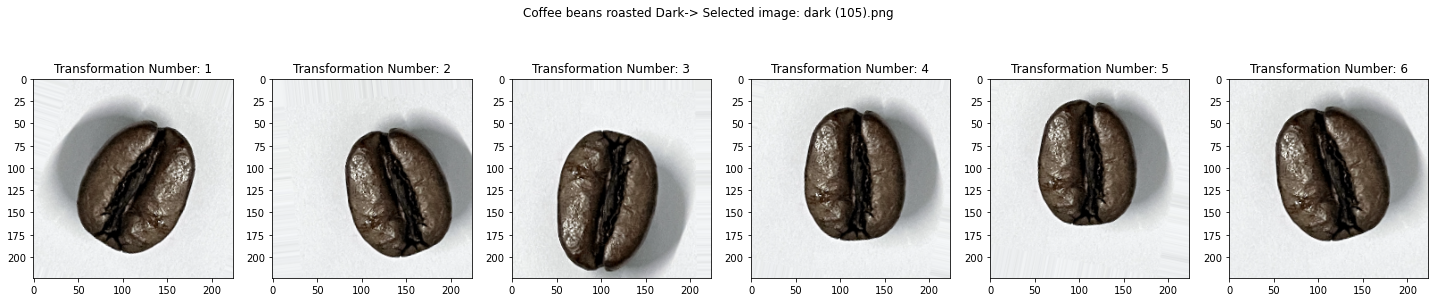

In [203]:
data_transformation_images("./train", image_generator, n = 6, figsize = (25, 5))

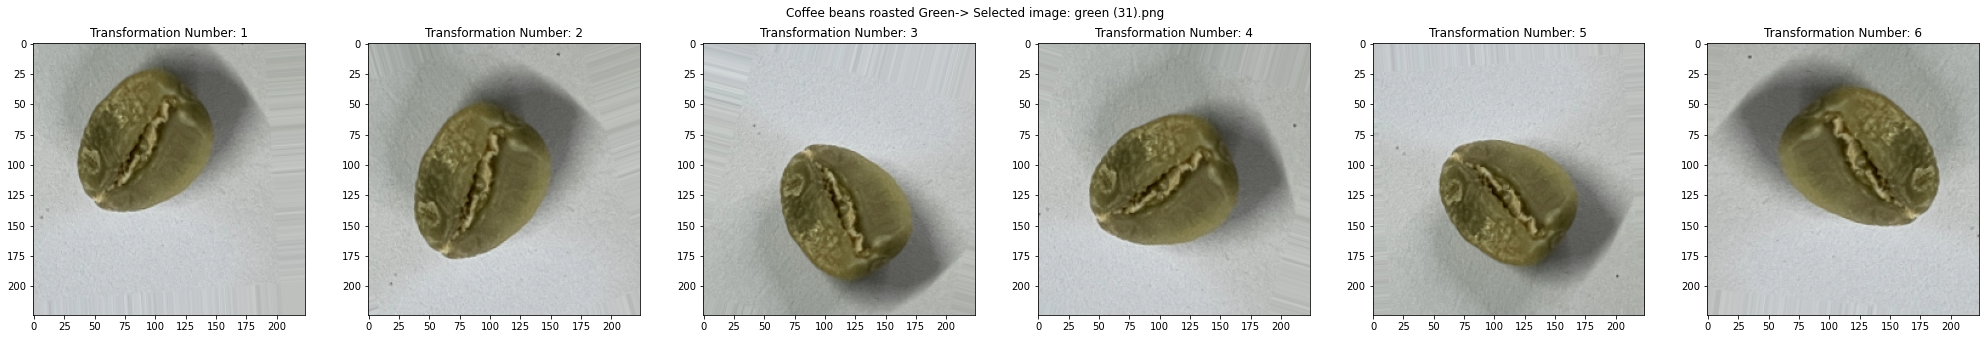

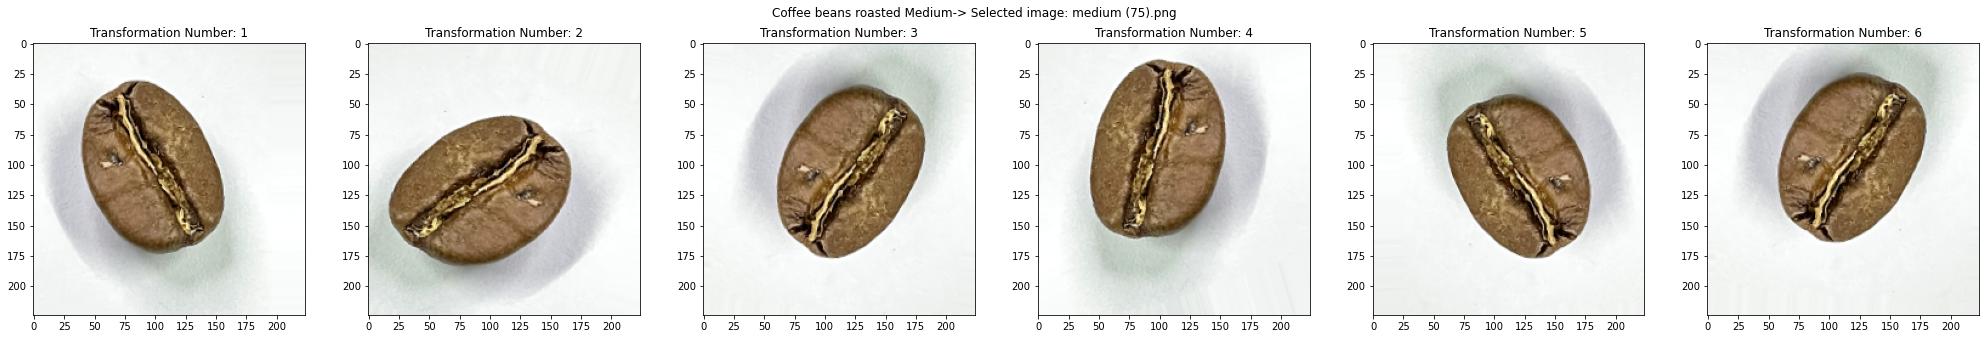

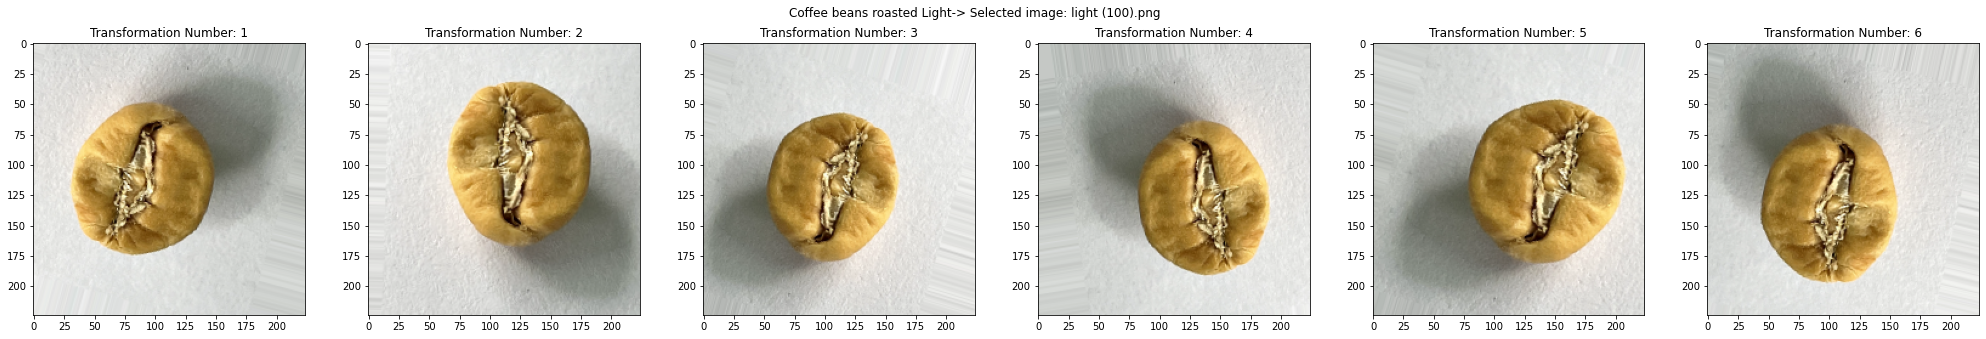

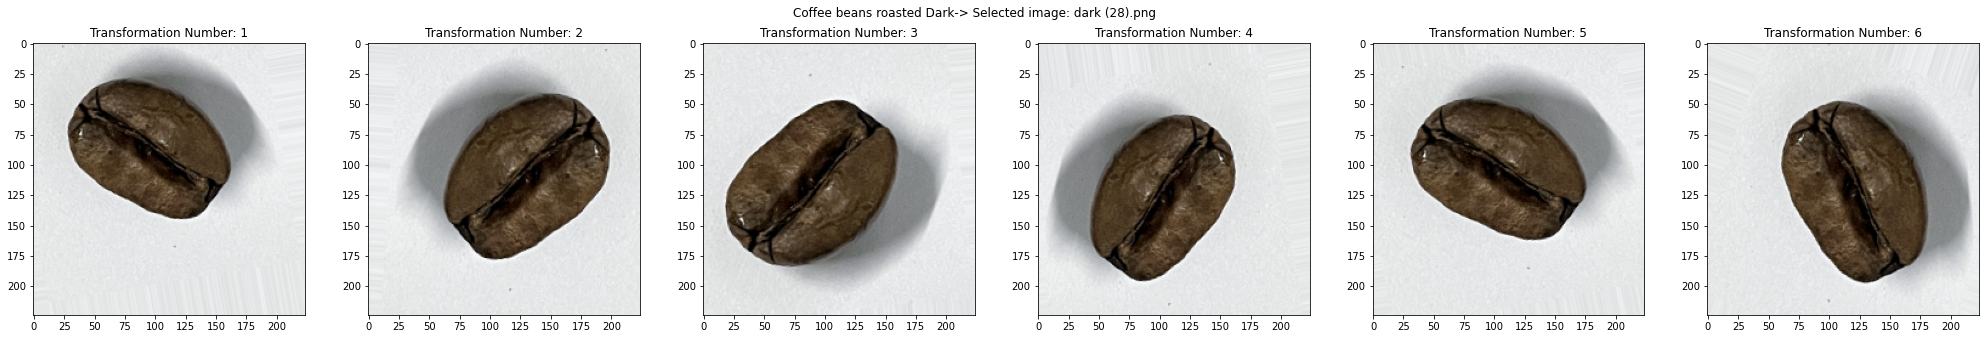

In [204]:
data_transformation_images("./test", image_generator, n = 6, figsize = (35, 5))

In [101]:
image_generator.flow_from_directory("./train")
image_generator.flow_from_directory("./test")

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [14]:
# hyperparameter setting
img_width = 128
img_height = 128

train_dir = './train'
test_dir = './test'

EPOCHS = 20
BATCH_SIZE = 32

INPUT_SHAPE = (img_width, img_height)

In [107]:
train_gen = image_generator.flow_from_directory(
    train_dir,
    target_size=INPUT_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=classes,
    subset='training',
    shuffle=True,
    seed=42
)

validation_gen = image_generator.flow_from_directory(
    train_dir,
    target_size=INPUT_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=classes,
    subset='validation',
    shuffle=True,
    seed=42
)

test_gen = image_generator.flow_from_directory(
    test_dir,
    target_size=INPUT_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=classes,
    shuffle=True,
    seed=42
)

Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [108]:
print("Training Image shape:", train_gen.image_shape)
print("Total number of classes:", train_gen.num_classes)
# RGB format with 3 layers, with height of the image in 64 pixels and width of the image in 64 pixels.

print("Validation Image shape:", validation_gen.image_shape)
print("Total number of classes:", validation_gen.num_classes)
# RGB format with 3 layers, with height of the image in 64 pixels and width of the image in 64 pixels.

print("Test Image shape:", test_gen.image_shape)
print("Total number of classes:", test_gen.num_classes)
# RGB format with 3 layers, with height of the image in 64 pixels and width of the image in 64 pixels.

Training Image shape: (128, 128, 3)
Total number of classes: 4
Validation Image shape: (128, 128, 3)
Total number of classes: 4
Test Image shape: (128, 128, 3)
Total number of classes: 4


In [130]:
model = Sequential()

#### Input Layer ####
model.add(
    Conv2D(filters=32, kernel_size=(3,3), padding='same'
           ,activation='relu', input_shape=(128,128,3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model.add(Conv2D(128, (5,5), activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Dropout(0.5))

#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [131]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_33 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 61, 61, 64)        36928     
                                                      

In [132]:
steps_for_each_epoch = train_gen.samples // BATCH_SIZE
validation_steps_for_each_epoch = validation_gen.samples // BATCH_SIZE

OPTIMIZER = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

## save model after every epoch ##
checkpointer = ModelCheckpoint(filepath='img_model.trained.weights.hdf5', verbose=1, save_best_only=True)

## Early stopping to stop over training Regularization
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

history = model.fit(
    train_gen, 
    epochs=EPOCHS, 
    steps_per_epoch=steps_for_each_epoch,
    validation_data=validation_gen,
    validation_steps=validation_steps_for_each_epoch,
    #callbacks=[early_stop, checkpointer, PlotLossesKeras()],
    verbose=True
)

Epoch 1/20
30/30 [==============================] - 115s 4s/step - loss: 1.3848 - accuracy: 0.2844 - val_loss: 1.3766 - val_accuracy: 0.2589
Epoch 2/20
30/30 [==============================] - 97s 3s/step - loss: 1.3350 - accuracy: 0.3521 - val_loss: 1.2600 - val_accuracy: 0.2545
Epoch 3/20
30/30 [==============================] - 97s 3s/step - loss: 0.8955 - accuracy: 0.6219 - val_loss: 0.6160 - val_accuracy: 0.7188
Epoch 4/20
30/30 [==============================] - 98s 3s/step - loss: 0.4150 - accuracy: 0.8417 - val_loss: 0.3699 - val_accuracy: 0.9018
Epoch 5/20
30/30 [==============================] - 113s 4s/step - loss: 0.2842 - accuracy: 0.9073 - val_loss: 0.3326 - val_accuracy: 0.8571
Epoch 6/20
30/30 [==============================] - 96s 3s/step - loss: 0.1905 - accuracy: 0.9302 - val_loss: 0.1637 - val_accuracy: 0.9375
Epoch 7/20
30/30 [==============================] - 99s 3s/step - loss: 0.1655 - accuracy: 0.9458 - val_loss: 0.1248 - val_accuracy: 0.9643
Epoch 8/20
30/30 [

In [133]:
model.save('coffee_beans_classifier.h5')

In [178]:
losses

loss  accuracy  val_loss  val_accuracy
0   1.384789  0.284375  1.376566      0.258929
1   1.334979  0.352083  1.259954      0.254464
2   0.895543  0.621875  0.616012      0.718750
3   0.415008  0.841667  0.369874      0.901786
4   0.284162  0.907292  0.332619      0.857143
5   0.190505  0.930208  0.163671      0.937500
6   0.165494  0.945833  0.124780      0.964286
7   0.150206  0.945833  0.088281      0.968750
8   0.143705  0.945833  0.137009      0.959821
9   0.123165  0.956250  0.073671      0.986607
10  0.134287  0.956250  0.074016      0.986607
11  0.114683  0.960417  0.106357      0.977679
12  0.113454  0.960417  0.050971      0.995536
13  0.115256  0.966667  0.059528      0.991071
14  0.118669  0.959375  0.116976      0.959821
15  0.104774  0.960417  0.067330      0.977679
16  0.092113  0.967708  0.079918      0.964286
17  0.109864  0.961458  0.069448      0.982143
18  0.085379  0.970833  0.051049      0.986607
19  0.086001  0.965625  0.042595      0.991071

##### Model performance

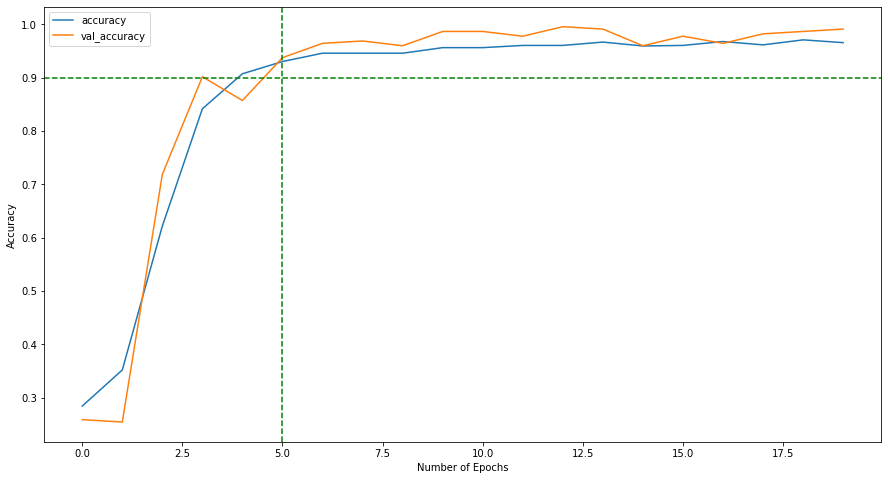

In [138]:
losses = pd.DataFrame(model.history.history)

losses[['accuracy', 'val_accuracy']].plot(figsize = (15, 8))
plt.axhline(0.90, color = 'green', linestyle = '--')
plt.axvline(5, color = 'green', linestyle = '--')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')

plt.show()

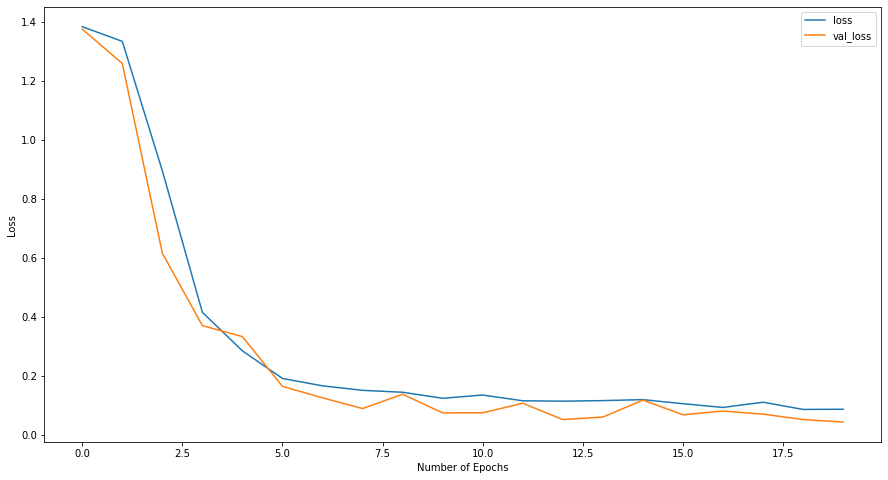

In [140]:
losses[['loss', 'val_loss']].plot(figsize = (15, 8))
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')

plt.show()

##### Prediction

In [152]:
test_data_gen = ImageDataGenerator(rescale=1/255.)

testgen = test_data_gen.flow_from_directory(
    test_dir,
    target_size=INPUT_SHAPE,
    batch_size=1,
    class_mode=None,
    classes=classes,
    shuffle=False,
    seed=42
)

Found 400 images belonging to 4 classes.


In [153]:
pred = model.predict(testgen)
predictions = np.argmax(pred, axis = 1)

400/400 [==============================] - 14s 34ms/step


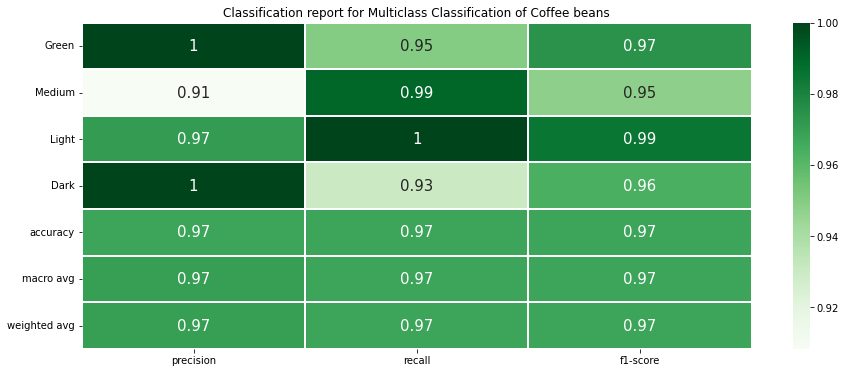

In [157]:
report = classification_report(testgen.classes, predictions, target_names = list(train_gen.class_indices), output_dict = True)

fig = plt.figure(figsize = (15,6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, 
            annot=True, linewidths = 2, annot_kws={'size': 15}, 
            cmap='Greens').set_title("Classification report for Multiclass Classification of Coffee beans")

plt.show()

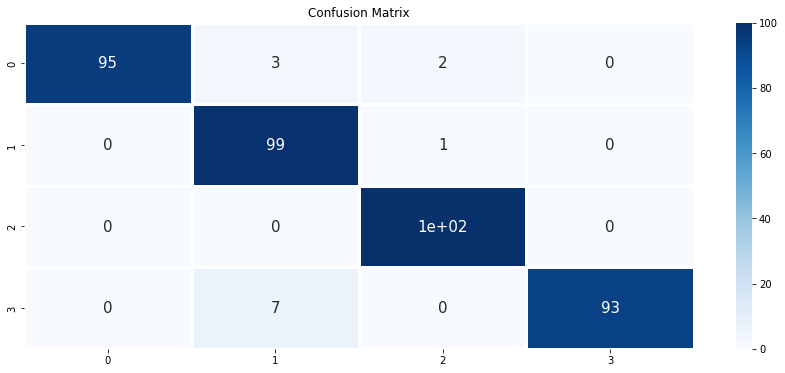

In [162]:
fig = plt.figure(figsize = (15,6))
sns.heatmap(confusion_matrix(testgen.classes, predictions), annot = True, linewidths = 3, annot_kws={'size': 15}, cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [164]:
def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)
    
    results.sort_values(by='F-Score', ascending=False, inplace=True)                           
    global_acc = accuracy_score(y_true, y_preds)
    
    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results

def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = y_preds[idx]
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

In [166]:
class_indices = train_gen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

In [171]:
display_results(true_classes, predictions, classes)

Overall Categorical Accuracy: 96.75%


Precision  Recall   F-Score  Support
Light    0.970874    1.00  0.985222    100.0
Green    1.000000    0.95  0.974359    100.0
Dark     1.000000    0.93  0.963731    100.0
Medium   0.908257    0.99  0.947368    100.0

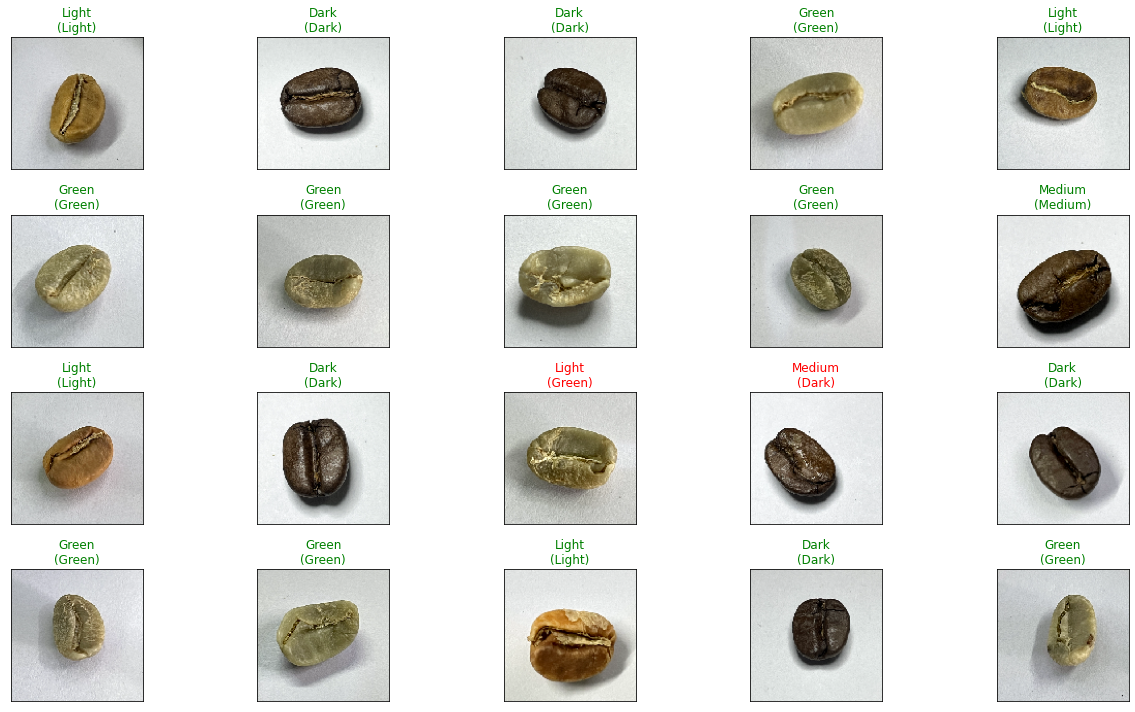

In [215]:
random.seed(50)
plot_predictions(true_classes, predictions, testgen, class_indices)

##### Model Tuning

In [187]:
from keras_tuner.tuners import RandomSearch
from kerastuner import HyperParameters

# Define the model architecture
def build_model(hp):
    
    model = keras.Sequential()
    
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,128,3)))

    model.add(layers.Conv2D(filters=hp.Choice('num_filters', values=[32, 64, 128], default=64), kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, default=0.2)))

    model.add(layers.Conv2D(filters=hp.Choice('num_filters', values=[64, 128, 256], default=128), kernel_size=(3,3), activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=hp.Choice('num_filters', values=[64, 128, 256], default=128), kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, default=0.2)))

    model.add(layers.Conv2D(filters=hp.Choice('num_filters', values=[128, 256, 512], default=256), kernel_size=(5,5), activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=hp.Choice('num_filters', values=[128, 256, 512], default=256), kernel_size=(5,5), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(4,4)))
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, default=0.5)))

    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('units', min_value=128, max_value=1024, step=64, default=256), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, default=0.2)))
    model.add(layers.Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [180]:
# Define the search space for hyperparameters
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuner_directory',
    project_name='image_classification_tuning'
)

# Perform hyperparameter tuning
tuner.search(train_gen, epochs=10, validation_data=validation_gen)

# Get the best model and summary of hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model.summary()
print(best_hyperparameters.values)

Trial 10 Complete [00h 44m 19s]
val_accuracy: 0.25

Best val_accuracy So Far: 0.987500011920929
Total elapsed time: 05h 11m 46s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 128)     36992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 128)       147584    
                      

In [205]:
history_best = best_model.fit(
    train_gen, 
    epochs=EPOCHS, 
    steps_per_epoch=steps_for_each_epoch,
    validation_data=validation_gen,
    validation_steps=validation_steps_for_each_epoch,
    #callbacks=[early_stop, checkpointer, PlotLossesKeras()],
    verbose=True
)

Epoch 1/20
30/30 [==============================] - 289s 10s/step - loss: 0.1350 - accuracy: 0.9646 - val_loss: 0.2114 - val_accuracy: 0.9241
Epoch 2/20
30/30 [==============================] - 360s 12s/step - loss: 0.0980 - accuracy: 0.9667 - val_loss: 0.1212 - val_accuracy: 0.9509
Epoch 3/20
30/30 [==============================] - 296s 10s/step - loss: 0.1010 - accuracy: 0.9646 - val_loss: 0.2042 - val_accuracy: 0.9464
Epoch 4/20
30/30 [==============================] - 347s 12s/step - loss: 0.1669 - accuracy: 0.9490 - val_loss: 0.0439 - val_accuracy: 0.9911
Epoch 5/20
30/30 [==============================] - 329s 11s/step - loss: 0.1392 - accuracy: 0.9573 - val_loss: 0.1654 - val_accuracy: 0.9509
Epoch 6/20
30/30 [==============================] - 339s 11s/step - loss: 0.1835 - accuracy: 0.9219 - val_loss: 0.0499 - val_accuracy: 0.9866
Epoch 7/20
30/30 [==============================] - 201s 7s/step - loss: 0.0733 - accuracy: 0.9771 - val_loss: 0.0359 - val_accuracy: 0.9866
Epoch 8

In [206]:
best_model.save('coffee_beans_classifier2.h5')

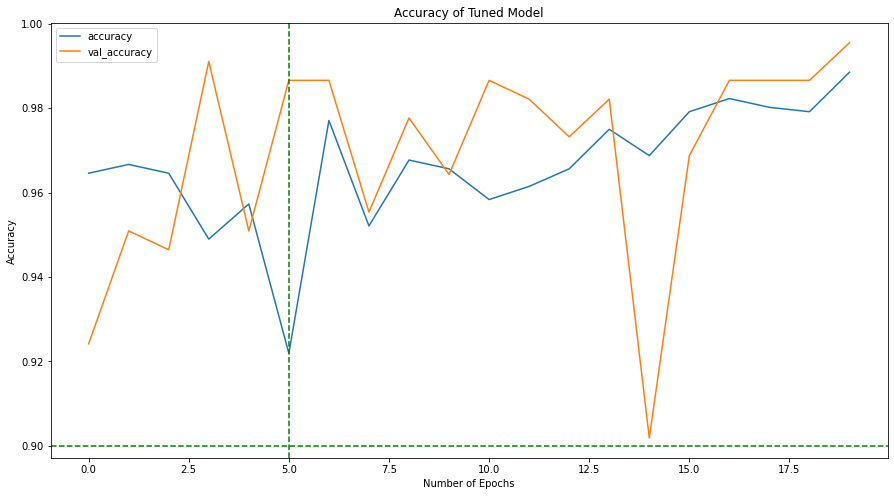

In [210]:
best_losses = pd.DataFrame(best_model.history.history)

best_losses[['accuracy', 'val_accuracy']].plot(figsize = (15, 8))
plt.axhline(0.90, color = 'green', linestyle = '--')
plt.axvline(5, color = 'green', linestyle = '--')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of Tuned Model')

plt.show()

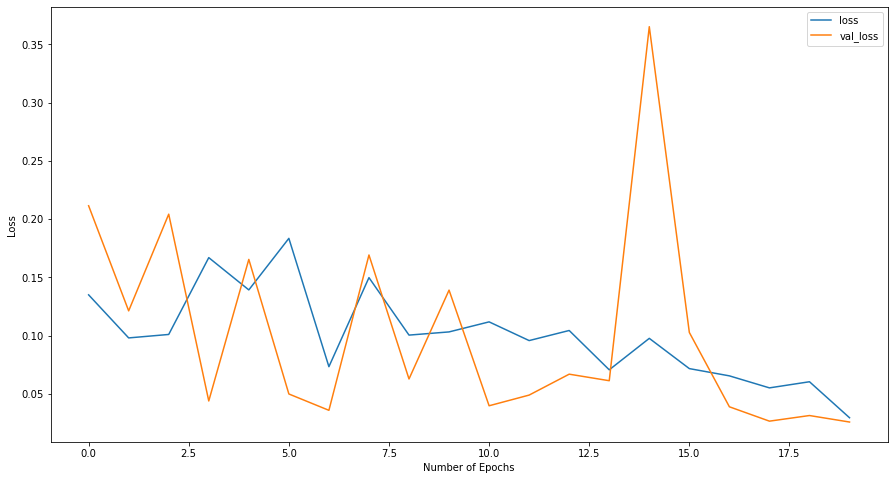

In [209]:
best_losses[['loss', 'val_loss']].plot(figsize = (15, 8))
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')

plt.show()

In [6]:
from tensorflow.keras.models import load_model

model = load_model('coffee_beans_classifier.h5')


In [23]:
def load_and_prep_image(filename, img_shape = 128):
    img = tf.io.read_file(filename) #read image
    img = tf.image.decode_image(img) # decode the image to a tensor
    img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
    img = img/255. # rescale the image
    return img

def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    #pred = model.predict(tf.expand_dims(img, axis=0))
    pred = model.predict(img)
    
    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round
        
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

In [18]:
class_names = classes

tg = ImageDataGenerator(rescale=1/255.)

t = tg.flow_from_directory(
    './tt.png',
    target_size=INPUT_SHAPE,
    batch_size=1,
    class_mode=None,
    classes=classes,
    shuffle=False,
    seed=42
)

Found 0 images belonging to 4 classes.


In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict_and_plot_image(model, image_path, classes):
    # Load and display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Resize, reshape, and normalize the image
    resized_image = image.resize((128, 128))
    image_array = np.array(resized_image)
    reshaped_image = image_array.reshape((1, 128, 128, 3))
    normalized_image = reshaped_image / 255.0

    # Make predictions
    predictions = model.predict(normalized_image)
    predicted_label = classes[np.argmax(predictions)]

    # Display the predicted class label
    print('Predicted Class: {}'.format(predicted_label))


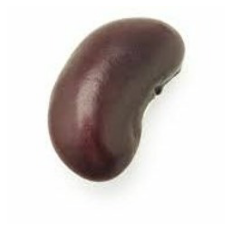

1/1 [==============================] - 0s 40ms/step
Predicted Class: Medium


In [35]:
predict_and_plot_image(model,'testtest2.jpeg',classes)

In [29]:
classes

['Dark', 'Green', 'Light', 'Medium']